| **Topic** | **Contents** |
| ----- | ----- |
| **1. Getting data ready** | Data can be almost anything but to get started we're going to create a simple straight line |
| **2. Building a model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Saving and loading a model** | You may want to use your model elsewhere, or come back to it later, here we'll cover that. |
| **6. Putting it all together** | Let's take all of the above and combine it. |

![Alt text](../images/01_a_pytorch_workflow.png)

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.0+cu117'

In [3]:
# build some data using linear regression simple equation
# y = weight * X + bias

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02)

y = weight * X + bias


X.shape , y.shape

(torch.Size([50]), torch.Size([50]))

In [4]:
X[:5] , y[:5]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560]))

In [5]:
# split the data into training and testing [80 % training] [ 20 % testing]
train_split = int(0.8*len(X))

X_train , X_test = X[:train_split] , X[train_split:]
y_train , y_test = y[:train_split] , y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    '''
    Plot predictions is a function to plot data and if you have a prediction you can compare it to the original data 
    '''
    plt.figure(figsize=(10,7))
    #plot the training data
    plt.scatter(train_data, train_labels,c='b',s=4,label='Training data')
    #plot the testing data
    plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

    # if i have a prediction
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

    # show the legend 
    plt.legend(prop={"size":14})

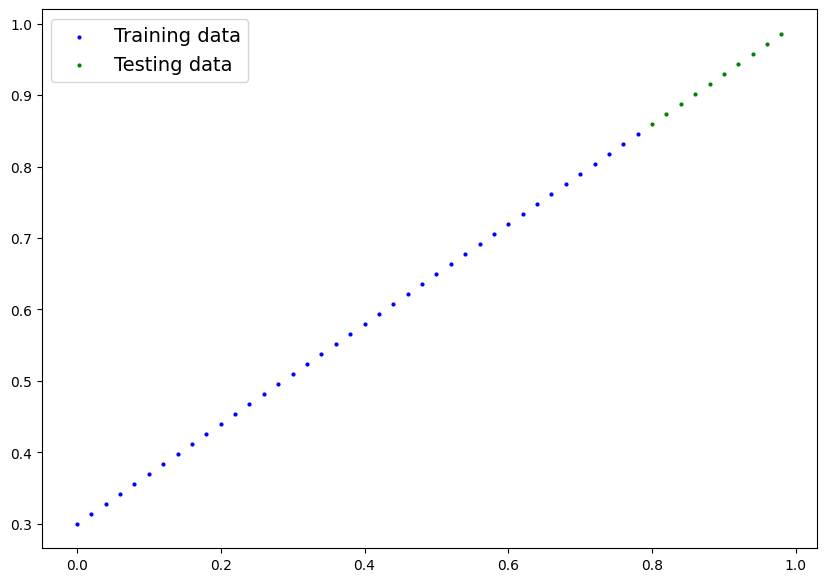

In [7]:
plot_predictions()

# lets build the model

In [9]:
# create a linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float), # torch.randn is giving us a random value that we will updates through training to reach the optimal answer
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), # dtype means datatype is the deafult pytorch data type which is float 32
                                requires_grad=True) # requires grad means that the parameter will be updates using gradient descent
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        # y = weight * x + bias
        return self.weights * x + self.bias

In [18]:
# check the content of this model
torch.manual_seed(42)
# create an instance of the model
model_0 = LinearRegressionModel()

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### what if we want to plot the output of the model before training on x_test data -> y = weight (0.3367) * x (X_test) + bias (0.1288)

In [21]:
# how to make a prediction using this model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [22]:
print(len(y_preds))
print(len(X_test))

10
10


In [23]:
print(y_preds)

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


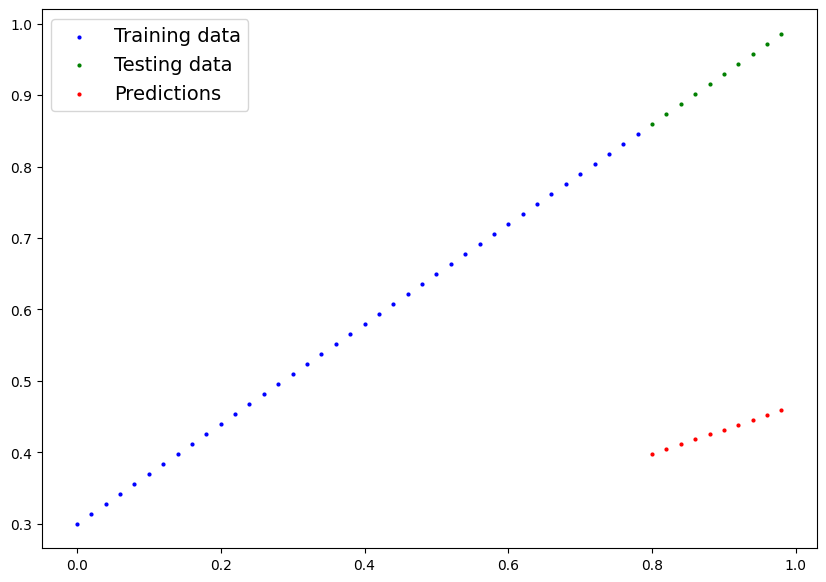

In [24]:
plot_predictions(predictions=y_preds)

# how to train a model ?

1. Right now our model is making predictions using random parameters values 
2. what we want to do is to update the model parameters to reach the optimal parameters

## Creating a loss function and an optimizer

1. loss function : Measures how wrong your models predictions are
2. optimizer : Guides your model to updates the parameters to lower the loss function (learning rate)

![Alt text](../images/loss.png)

In [26]:
# loss function 
loss_fn = nn.L1Loss() # MAE loss function for our model

In [27]:
# lets create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)